In [14]:
import numpy as np
import PIL
from PIL import Image

list_im = [
#     './output_images/colorTH-test1.png'
#           ,'./output_images/combined-test1.png'
          './output_images/fs.png'
          , './output_images/cc.png'
          ]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# #pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
# min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
# imgs_comb = np.hstack( (np.asarray( i) ) for i in imgs ) 

# # save that beautiful picture
# imgs_comb = PIL.Image.fromarray( imgs_comb)
# imgs_comb.save( './output_images/cc.png' )    

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray( i ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( './output_images/Lane_thresh.png' )

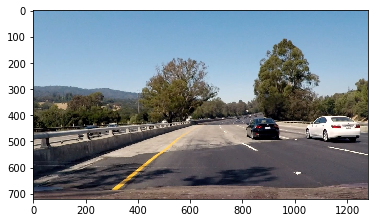

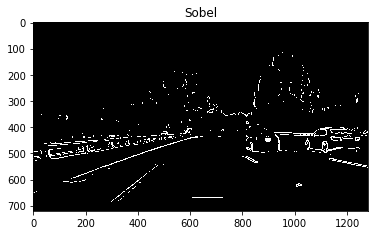

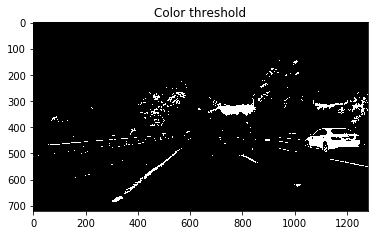

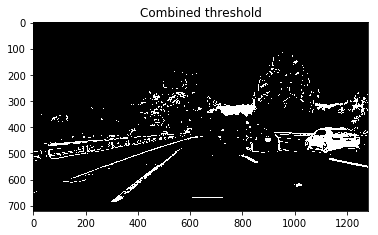

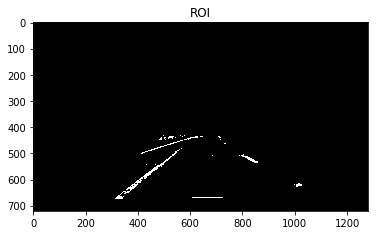

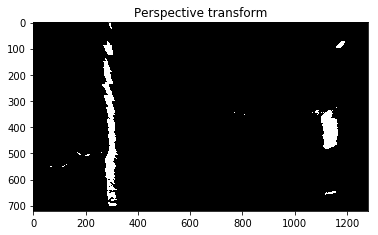

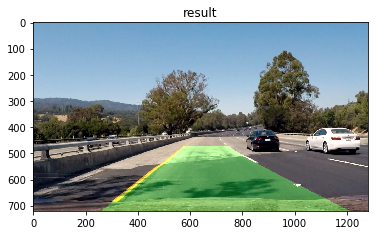

In [9]:
from LaneDetect import *

image=cv2.imread('./test_images/test4.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

[ret, mtx, dist, rvecs,tvecs] =undistorT(image)
font = cv2.FONT_HERSHEY_SIMPLEX
frame=image
gray =cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)
sobel_edge= SobelThr(gray) 
plt.title('Sobel')
plt.imshow(sobel_edge,cmap='gray')
plt.savefig('./output_images/sobelTH-test1.png')
plt.show()
color_threshld= ColorThreshold(frame)
plt.title('Color threshold')
plt.imshow(color_threshld,cmap='gray')
plt.savefig('./output_images/colorTH-test1.png')
plt.show()
comI=combinI(sobel_edge,color_threshld) 
plt.title('Combined threshold')
plt.imshow(comI,cmap='gray')
plt.savefig('./output_images/combined-test1.png')
plt.show()
roib=region_of_interest(comI)
plt.title('ROI')
plt.imshow(roib,cmap='gray')
plt.savefig('./output_images/roi-test1.png')
plt.show()


undistI=undistresult(roib, mtx,dist)
pI, pM=prespectI(undistI)  
#     pI = cv2.inRange(pI, 10, 255)
Minv = np.linalg.inv(pM)
plt.title('Perspective transform')
plt.imshow(pI,cmap='gray')
plt.savefig('./output_images/pi-test1.png')
plt.show()
[left_fit, ploty,right_fit,lc, rc, offset]= LineFitting(pI)
uW=unwrappedframe(frame,pI,Minv,left_fit, ploty,right_fit)
plt.title('result')
plt.imshow(uW)
plt.savefig('./output_images/result-test1.png')
plt.show()
uW=cv2.putText(uW,'Curvature left: %.1f m'%lc,(50,50), 
                font, 1,(255,255,255),2,cv2.LINE_AA)
uW=cv2.putText(uW,'Curvature right: %.1f m'%rc,(50,100),
               font, 1,(255,255,255),2,cv2.LINE_AA)
uW=cv2.putText(uW,'Car position to centre: %.1f m'%offset,(50,150),
               font, 1,(255,255,255),2,cv2.LINE_AA)